In [ ]:
# Wine Characteristics Clustering
# Group wines into clusters based on chemical attributes using k-means, GMM, and hierarchical clustering.

# 1. Install and import libraries
!pip install numpy pandas matplotlib seaborn scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

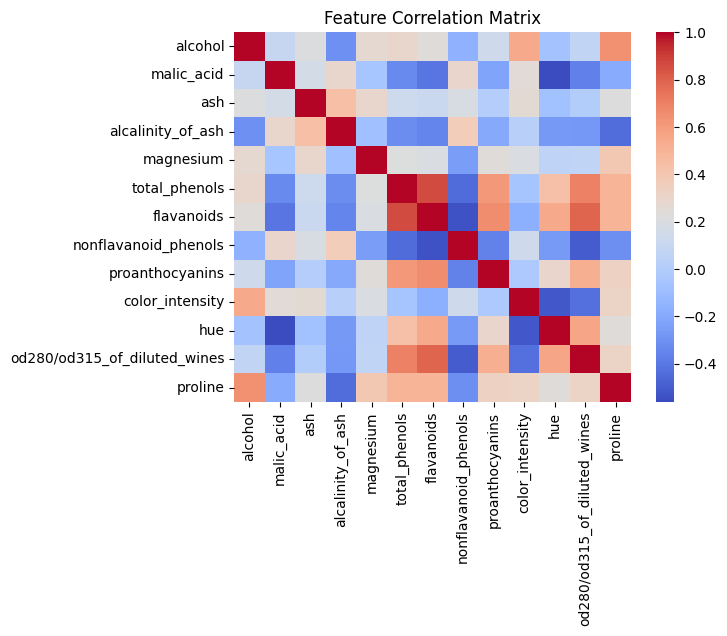

In [2]:
# 2. Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# 3. Exploratory Data Analysis
print(X.head())
print(X.describe().T)

# Correlation matrix\plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [10]:
# Count of NaN values per column
nan_counts = X.isna().sum()

# Count of duplicate rows
duplicate_count = X.duplicated().sum()

print("NaN Values per Column:\n", nan_counts)
print("\nTotal Duplicate Rows:", duplicate_count)

NaN Values per Column:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Total Duplicate Rows: 0


In [3]:
# 4. Preprocessing: scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# 5. Clustering methods (k=3 as heuristic)
k = 4

# 5.1 K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)
k_silhouette = silhouette_score(X_scaled, k_labels)
print(f"K-Means Silhouette Score (k={k}): {k_silhouette:.3f}")

K-Means Silhouette Score (k=4): 0.254


In [13]:
# 5.2 Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
print(f"GMM Silhouette Score (k={k}): {gmm_silhouette:.3f}")

GMM Silhouette Score (k=4): 0.254


In [14]:
# 5.3 Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=k)
agg_labels = agg.fit_predict(X_scaled)
agg_silhouette = silhouette_score(X_scaled, agg_labels)
print(f"Agglomerative Clustering Silhouette Score (k={k}): {agg_silhouette:.3f}")

Agglomerative Clustering Silhouette Score (k=4): 0.226


In [15]:
# 6. Summary of scores
scores = pd.DataFrame({
    'Method': ['KMeans', 'GMM', 'Agglomerative'],
    'Silhouette': [k_silhouette, gmm_silhouette, agg_silhouette]
})
print(scores)

          Method  Silhouette
0         KMeans    0.254228
1            GMM    0.254228
2  Agglomerative    0.225837


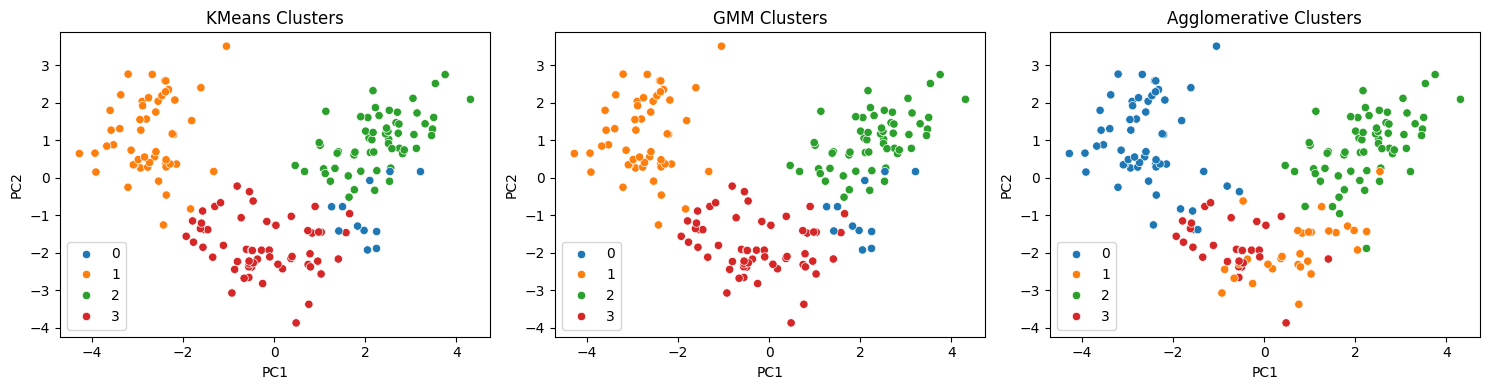

In [16]:
# 7. 2D visualization via PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(15,4))

for i, (labels, name) in enumerate(zip([k_labels, gmm_labels, agg_labels], ['KMeans', 'GMM', 'Agglomerative']), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=components[:,0], y=components[:,1], hue=labels, palette='tab10', legend='full')
    plt.title(f'{name} Clusters')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# 8. Interpretation
# Compare silhouette scores to choose the method with the best cohesion and separation.


    k      Inertia  Silhouette
0   2  1661.676117    0.265033
1   3  1277.928489    0.284859
2   4  1211.753113    0.254228
3   5  1123.156547    0.183621
4   6  1079.538509    0.168992
5   7  1014.430909    0.172602
6   8   982.654976    0.162504
7   9   927.956076    0.173874
8  10   879.425701    0.139567
Best k by Silhouette Score: 3


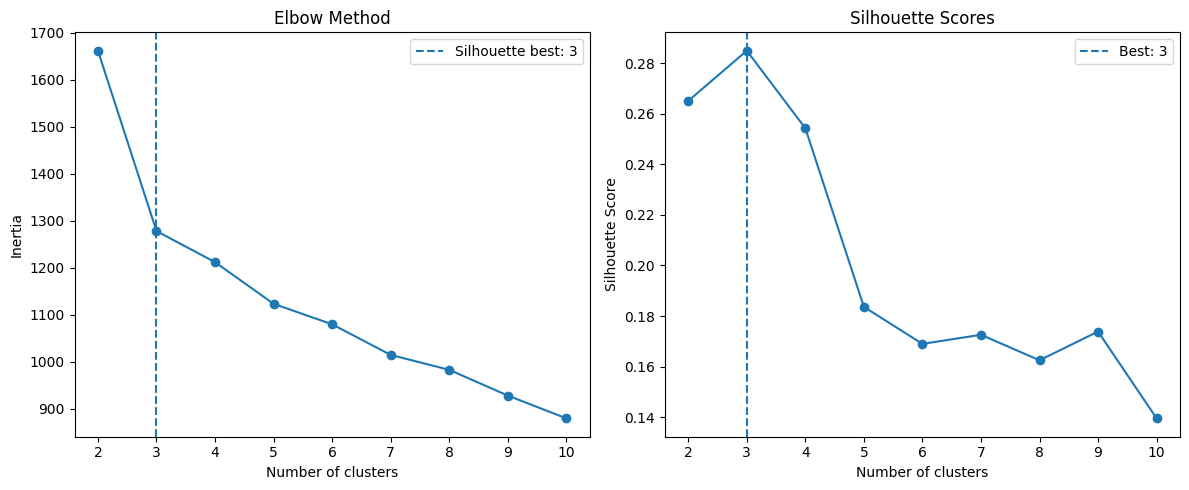

In [17]:
# 4. Evaluate clustering for different k
range_n_clusters = list(range(2, 11))  # try k from 2 to 10
inertias = []
silhouette_scores = []

for k in range_n_clusters:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# 5. Summarize results and determine best k
results_df = pd.DataFrame({
    'k': range_n_clusters,
    'Inertia': inertias,
    'Silhouette': silhouette_scores
})
print(results_df)

# Identify optimal k by silhouette
best_k_silhouette = int(results_df.loc[results_df['Silhouette'].idxmax(), 'k'])
print(f"Best k by Silhouette Score: {best_k_silhouette}")

# 6. Plot metrics with best k annotated
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results_df['k'], results_df['Inertia'], marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.axvline(best_k_silhouette, linestyle='--', label=f'Silhouette best: {best_k_silhouette}')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_df['k'], results_df['Silhouette'], marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.axvline(best_k_silhouette, linestyle='--', label=f'Best: {best_k_silhouette}')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Interpretation
# Use the Elbow method and Silhouette score to choose k, e.g., k = best_k_silhouette
